<a href="https://colab.research.google.com/github/Sruthi23Yaradi/SentimentAnalysisofRestaurantReviews-/blob/main/Sentiment_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv',delimiter='\t', quoting=3)

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus= []
for i in range(0,1000):
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.20, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
#Naive Bayes Modelling
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1= accuracy_score(y_test,y_pred)
score2= precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

print("---Scores---")
print("Accuracy Score: {}%".format(round(score1*100,2)))
print("Precision Score: {}%".format(round(score2*100,2)))
print("Recall Score: {}%".format(round(score3*100,2)))

---Scores---
Accuracy Score: 76.5%
Precision Score: 76.42%
Recall Score: 78.64%


In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_test, y_pred)
c

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

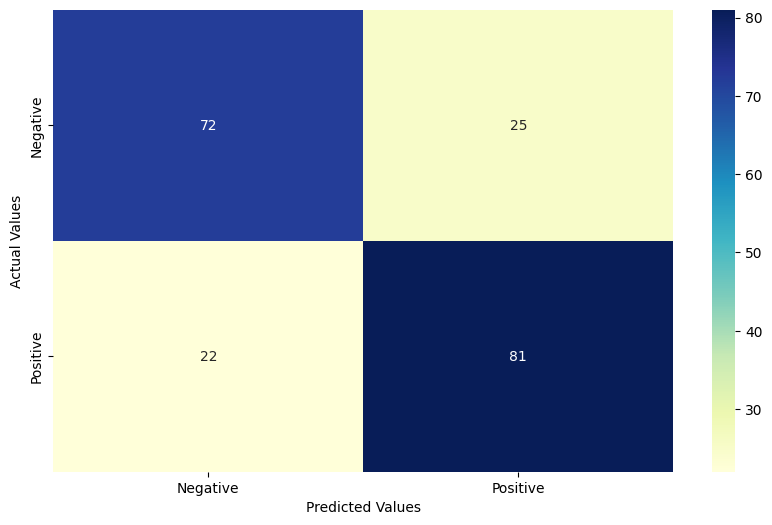

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,6))
sns.heatmap(c, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [ ]:
#Hyperparameter tuning for Naive Bayes Classifier
best_acc= 0.0
alpha= 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier= MultinomialNB(alpha=i)
  temp_classifier.fit(x_train,y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score= accuracy_score(y_test,temp_y_pred)
  print("Accuracy for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
  if score>best_acc:
    best_acc= score
    alpha_val = i
print("--------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_acc*100,2), round(alpha_val,1)))


Accuracy for alpha=0.1 is: 78.0%
Accuracy for alpha=0.2 is: 78.5%
Accuracy for alpha=0.3 is: 78.0%
Accuracy for alpha=0.4 is: 78.0%
Accuracy for alpha=0.5 is: 77.5%
Accuracy for alpha=0.6 is: 77.5%
Accuracy for alpha=0.7 is: 77.5%
Accuracy for alpha=0.8 is: 77.0%
Accuracy for alpha=0.9 is: 76.5%
Accuracy for alpha=1.0 is: 76.5%
--------------
The best accuracy is 78.5% with alpha value as 0.2


In [ ]:
classifier= MultinomialNB(alpha=0.2)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.30, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

score1= accuracy_score(y_test,y_pred)
score2= precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

print("---Scores---")
print("Accuracy Score: {}%".format(round(score1*100,2)))
print("Precision Score: {}%".format(round(score2*100,2)))
print("Recall Score: {}%".format(round(score3*100,2)))

---Scores---
Accuracy Score: 71.33%
Precision Score: 75.91%
Recall Score: 66.24%


In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_test, y_pred)
c

array([[110,  33],
       [ 53, 104]])

Text(95.72222222222221, 0.5, 'Actual Values')

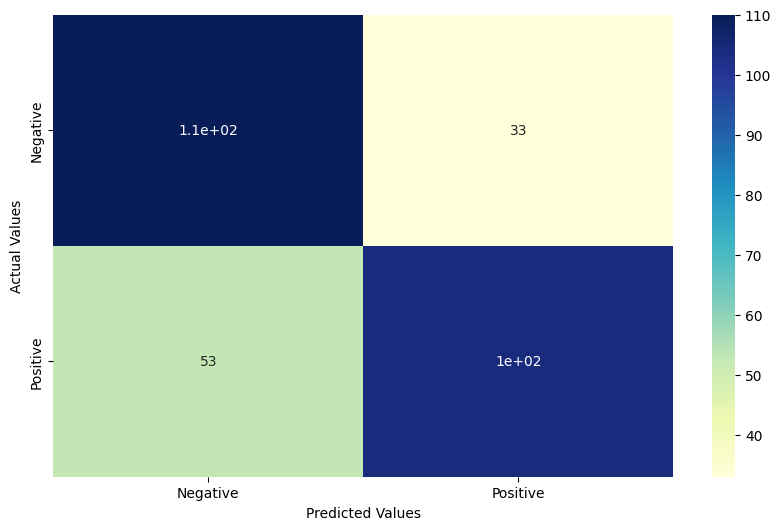

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,6))
sns.heatmap(c, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.20, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
#Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("---Scores---")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Precision Score: {}%".format(round(precision_score(y_test,y_pred)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred)*100,2)))

accuracy_score(y_test,y_pred)
score2= precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

---Scores---
Accuracy Score: 70.0%
Precision Score: 81.16%
Recall Score: 54.37%


In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_test, y_pred)
c

array([[84, 13],
       [47, 56]])

Text(95.72222222222221, 0.5, 'Actual Values')

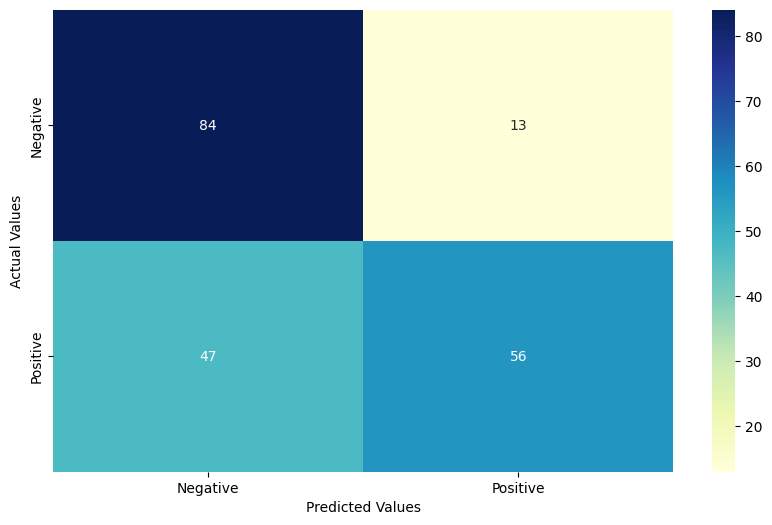

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,6))
sns.heatmap(c, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [ ]:
#prediction
def predict_review(sample_review):
  sample_review= re.sub(pattern='[^a-zA-Z]', repl=' ', string= sample_review)
  sample_review= sample_review.lower()
  sample_review_words= sample_review.split()
  sample_review_words= [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps= PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review= ' '.join(final_review)

  temp= cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review= input("Enter your Review:")
if predict_review(sample_review):
  print("This a POSITIVE Review")
else:
  print("This a NEGATIVE Review")

Enter your Review:The ambience is good, but the food is average
This a POSITIVE Review
